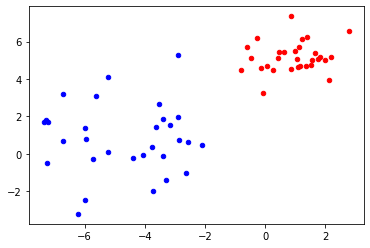

In [2]:
# Author: Meduri Venkata Shivaditya
import superimport

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import bayes_logistic # pip install bayes_logistic
import warnings
import pyprobml_utils as pml
warnings.filterwarnings("ignore", category=RuntimeWarning)


np.random.seed(135)
#Creating data
N = 30
D = 2
mu1 = np.hstack((np.ones((N,1)), 5 * np.ones((N, 1))))
mu2 = np.hstack((-5 * np.ones((N,1)), np.ones((N, 1))))
class1_std = 1
class2_std = 1.1
X_1 = np.add(class1_std*np.random.randn(N,2), mu1)
X_2 = np.add(2*class2_std*np.random.randn(N,2), mu2)
X = np.vstack((X_1,X_2))
t = np.vstack((np.ones((N,1)),np.zeros((N,1))))

#Plotting data
x_1, y_1 = X[np.where(t==1)[0]].T
x_2, y_2 = X[np.where(t==0)[0]].T
plt.figure(0)
plt.scatter(x_1,y_1,c = 'red', s=20, marker = 'o')
plt.scatter(x_2,y_2,c = 'blue', s = 20, marker = 'o')

Text(0.5, 1.0, 'data')

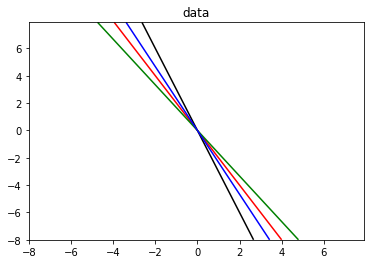

In [3]:
#Plotting Predictions
alpha = 100
Range = 8
step = 0.1
xx, yy = np.meshgrid(np.arange(-Range,Range,step),np.arange(-Range,Range,step))
[n,n] = xx.shape
W = np.hstack((xx.reshape((n*n, 1)),yy.reshape((n*n, 1))))
Xgrid = W
ws = np.array([[3, 1], [4, 2], [5, 3], [7, 3]])
col = ['black', 'red', 'green', 'blue']
for ii in range(ws.shape[0]):
    w = ws[ii][:]
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,w)))
    plt.contour(xx, yy, pred.reshape((n, n)), 1, colors=col[ii])
plt.title("data")

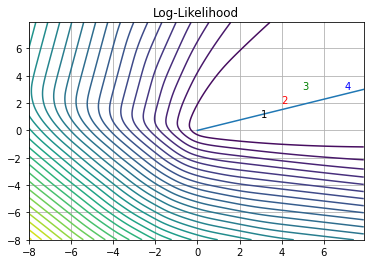

In [15]:
Xt = np.transpose(X)
f=np.dot(W,Xt)
log_prior = np.log(multivariate_normal.pdf(W, cov=(np.identity(D))*alpha))

log_like = np.dot(np.dot(W, Xt), t) - np.sum(np.log(1+np.exp(f)), 1).reshape((n*n,1))
log_joint = log_like.reshape((n*n,1)) + log_prior.reshape((n*n,1))

#Plotting log-prior
#plt.figure(1)
#plt.contour(xx, yy, -1*log_prior.reshape((n,n)), 30)
#plt.title("Log-Prior")

plt.figure(1)
plt.contour(xx, yy, -1*log_joint.reshape((n,n)), 30)
plt.title("Log-Likelihood")

#Plotting points corresponding to chosen lines
for ii in range(0, ws.shape[0]):
    w = np.transpose(ws[ii, :])
    plt.annotate(str(ii+1), xy=(w[0], w[1]), color=col[ii])

j=np.argmax(log_like)
wmle = W[j, :]
slope = wmle[1] / wmle[0]
#plt.axline([wmle[0], wmle[1]], slope=slope)

plt.plot([0, 7.9], [0, 7.9*slope])
plt.grid()

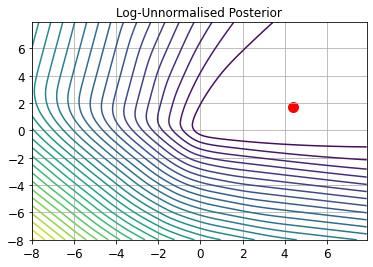

In [6]:
#Plotting the log posterior(Unnormalised
plt.figure(2)
plt.contour(xx,yy,-1*log_joint.reshape((n,n)), 30)
plt.title("Log-Unnormalised Posterior")
j2=np.argmax(log_joint)
wb = W[j2][:]
plt.scatter(wb[0], wb[1], c='red' , s = 100)
plt.grid()

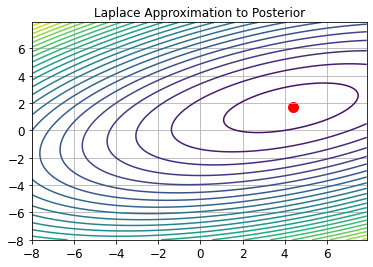

In [27]:
#Plotting the Laplace approximation to posterior
plt.figure(3)
#https://bayes-logistic.readthedocs.io/en/latest/usage.html
#Visit the website above to access the source code of bayes_logistic library
#parameter info : bayes_logistic.fit_bayes_logistic(y, X, wprior, H, weights=None, solver='Newton-CG', bounds=None, maxiter=100)
wfit, hfit = bayes_logistic.fit_bayes_logistic(t.reshape((N*D)), X, np.zeros(D), ((np.identity(D))*1/alpha), weights=None, solver='Newton-CG', bounds=None, maxiter=100)
co = np.linalg.inv(hfit)
#wfit represents the posterior parameters (MAP estimate)
#hfit represents the posterior Hessian  (Hessian of negative log posterior evaluated at MAP parameters)
log_laplace_posterior = np.log(multivariate_normal.pdf(W, mean = wfit, cov=co))
plt.contour(xx, yy, -1*log_laplace_posterior.reshape((n,n)), 30)
plt.scatter(wb[0], wb[1], c='red' , s = 100)
plt.title("Laplace Approximation to Posterior")
plt.grid()

In [19]:
alpha = 0.00001
bayes_logistic.fit_bayes_logistic(t.reshape((N*D)), X, np.zeros(D), ((np.identity(D))*1/alpha), weights=None, solver='Newton-CG', bounds=None, maxiter=100)

(array([0.00084156, 0.00065165]),
 array([[1.00197923e+05, 8.61458161e+00],
        [8.61458161e+00, 1.00235283e+05]]))

In [38]:
bayes_logistic.H_log_posterior(wfit, np.zeros(D), ((np.identity(D))*1/alpha), t.reshape((N*D)), X)
bayes_logistic.logistic_prob(X,wfit)

array([9.99664650e-01, 9.99664650e-01, 9.99664650e-01, 9.99664650e-01,
       9.99664650e-01, 9.99115744e-01, 9.99664650e-01, 9.99664650e-01,
       9.99664650e-01, 9.99664650e-01, 9.99664650e-01, 9.99664650e-01,
       9.99664650e-01, 9.99664650e-01, 9.99664650e-01, 9.93165565e-01,
       9.99664650e-01, 9.99664650e-01, 9.99664650e-01, 9.99664650e-01,
       9.99664650e-01, 9.99664650e-01, 9.79500392e-01, 9.99664650e-01,
       9.99664650e-01, 9.99664650e-01, 9.99664650e-01, 9.99664650e-01,
       9.98898576e-01, 9.98407912e-01, 3.35350130e-04, 3.35350130e-04,
       3.35350130e-04, 3.35350130e-04, 3.35350130e-04, 3.35350130e-04,
       3.35350130e-04, 2.36221824e-02, 3.35350130e-04, 3.35350130e-04,
       3.35350130e-04, 3.35350130e-04, 3.35350130e-04, 3.35350130e-04,
       3.35350130e-04, 3.35350130e-04, 3.35350130e-04, 3.35350130e-04,
       3.35350130e-04, 3.35350130e-04, 3.35350130e-04, 3.35350130e-04,
       3.35350130e-04, 3.35350130e-04, 3.35350130e-04, 3.35350130e-04,
      

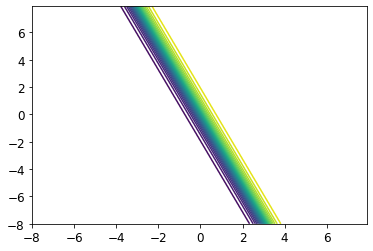

In [16]:
#Plotting the predictive distribution for logistic regression
plt.figure(5)
pred = 1.0/(1+np.exp(np.dot(-Xgrid,wfit)))
pred.reshape((n,n))
plt.contour(xx, yy, pred.reshape((n,n)), 30)
#x_1, y_1 = X[np.where(t == 1)[0]].T
#x_2, y_2 = X[np.where(t == 0)[0]].T
#plt.scatter(x_1, y_1, c='red', s=20, marker='o')
#plt.scatter(x_2, y_2, c = 'blue', s=40, marker = 'o')
#plt.title("p(y=1|x, wMAP)")

Text(0.5, 1.0, 'Decision boundary for sampled w')

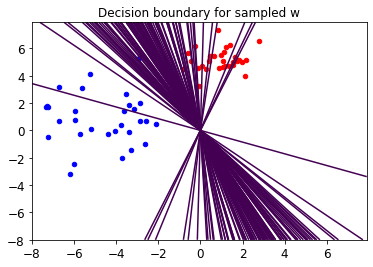

In [17]:
plt.figure(6)
plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c='blue', s=20, marker='o')
predm = np.zeros((n*n,1))
s = 100
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    predm = np.add(predm, pred.reshape((n*n, 1)))
    plt.contour(xx, yy, pred.reshape((n,n)), np.array([0.5]))
plt.title("Decision boundary for sampled w")

Text(0.5, 1.0, 'MC approx of p(y=1|x)')

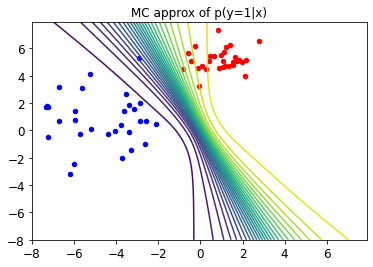

In [39]:
plt.figure(7)
predm = predm/s
plt.contour(xx, yy, predm.reshape((n,n)), 30)
plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c='blue', s=20, marker='o')
plt.title("MC approx of p(y=1|x)")

Text(0.5, 1.0, 'Deterministic approx of p(y=1|x)')

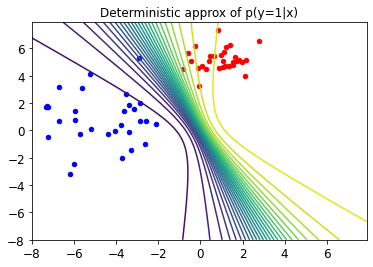

In [41]:
plt.figure(8)
plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c='blue', s=20, marker='o')
pr = bayes_logistic.bayes_logistic_prob(Xgrid, wfit, hfit)
plt.contour(xx, yy, pr.reshape((n, n)), 30)
plt.title("Deterministic approx of p(y=1|x)")